In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df=pd.read_csv('project_1 wine_dataset.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Dataset Description

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

# Attribute Information

Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

In [3]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


It will show 10 rows from the top of the dataset

In [4]:
df.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


It will show last 10 rows of the dataset

# Exploratory Data Analysis (EDA)

In [5]:
#Checking for all the columns present in the dataset
df.columns.to_list()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

There are 12 columns present in the dataset in which 11 columns are input variable and 1 column('quality') is the output variable

In [6]:
#checking for the data types of the columns 
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

There are two different types of data present in the dataset 'float64','int64'

In [8]:
#checking for the dimension of the dataset
df.shape

(1599, 12)

This dataset has 1599 rows and 12 columns

In [9]:
#checking for the null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

As we can see there are no null values present in the dataset

<AxesSubplot:>

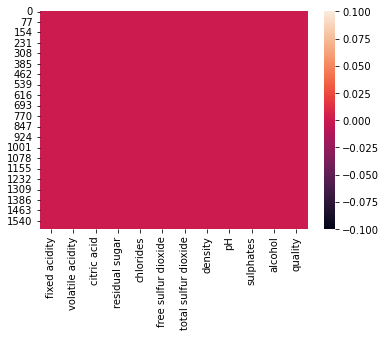

In [10]:
#Graphical representation to check null values
sns.heatmap(df.isnull())

In [11]:
#For a breif overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
#cheking total number of unique value present in target column
df.quality.nunique()

6

In [13]:
#checking for unique values
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

quality score scale ranges from 3 to 8; where 3 is low quality and 8 is best

In [14]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

We can see that quality has most values concentrated in the categories of 5,6,7 & few observations are present in the categorical in 3 and 8.

In [15]:
#Description of the dataset 
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


This will give a statistical summary of all the numerical columns present in the dataset.

From the above description we can observe that=

1.The mean is more than median(50 th percentile) in all the columns.

2.There is a large difference in 75% percentile and max in residual sugar, free sulfur dioxide, total sulfur dioxide

3.From the above observation(1&2) we can assume that outliers and skewness is present in the dataset.

4.The counts of all the columns are same which means there are no missing values in the dataset.

5.we can also notice the standard deviation(std.), max., min., 25% percentile, 50% percentile, 75% percentile values from this describe method.

# Checking Correlation

In [16]:
#checking correlation between target and independent variables
df_corr=df.corr()
df_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


It will give th correlation between the dependent and independent variables. accpectable range is between -1 to +1

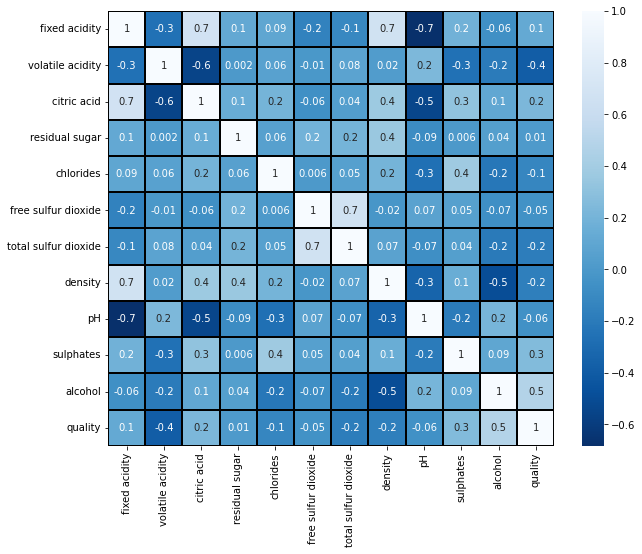

In [17]:
#visualizing the correlation by using heatmap 
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, linewidths=0.1, fmt='.1g', linecolor='black', cmap='Blues_r', annot=True)
plt.show()

observations=


1. This heatmap shows the correlation matrix by visualizing the data. We can observe the relation between input and target.    This heatmap contains both positive and negative correlation.


2. light shades are highly correlated


3. free sulphuric acid is highly correlated with total sulfer dioxide


4. volatile acidity is negatively correlated with quality


5. volatile acidity and citric acid is negatively correlated to each other.

# Data Visualization

# Univarient analysis

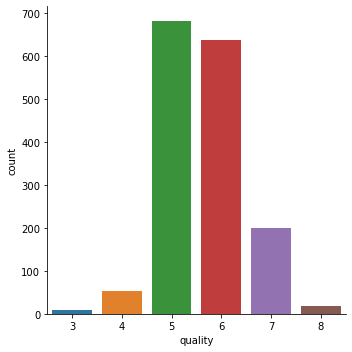

In [42]:
sns.catplot(x='quality', data=df, kind='count')

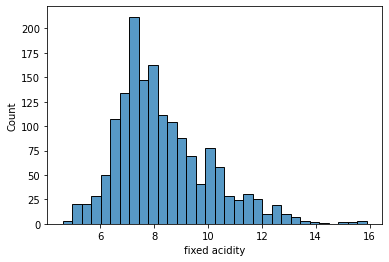

In [18]:
sns.histplot(df['fixed acidity'])
plt.show()

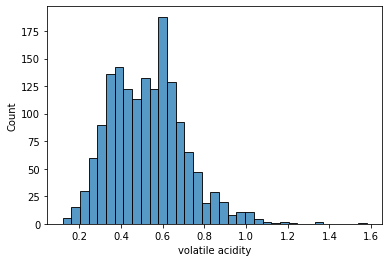

In [19]:
sns.histplot(df['volatile acidity'])
plt.show()

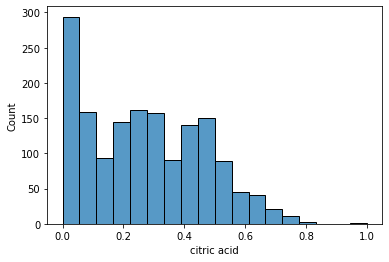

In [20]:
sns.histplot(df['citric acid'])
plt.show()

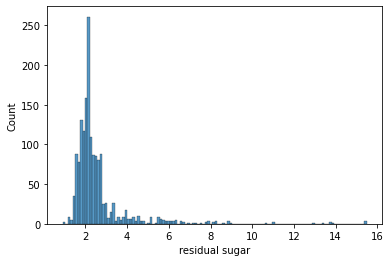

In [21]:
sns.histplot(df['residual sugar'])
plt.show()

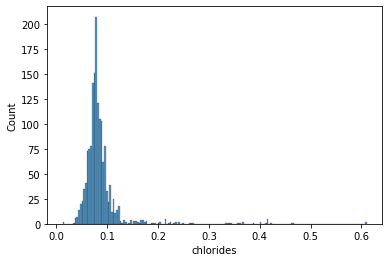

In [22]:
sns.histplot(df['chlorides'])
plt.show()

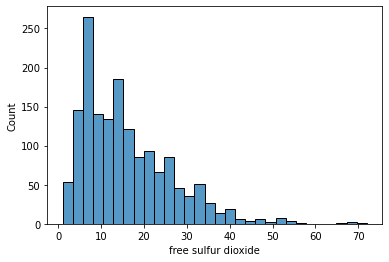

In [23]:
sns.histplot(df['free sulfur dioxide'])
plt.show()

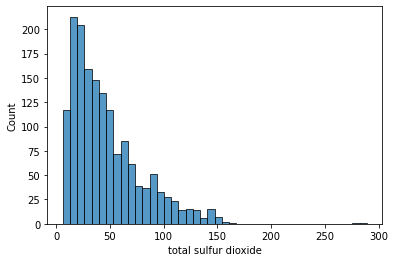

In [24]:
sns.histplot(df['total sulfur dioxide'])
plt.show()

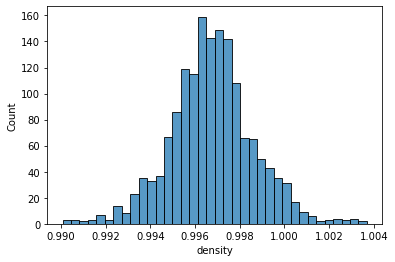

In [25]:
sns.histplot(df['density'])
plt.show()

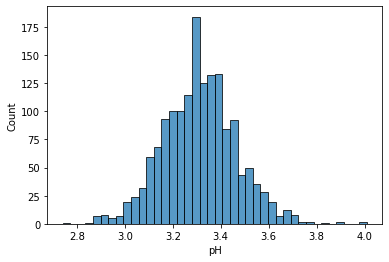

In [26]:
sns.histplot(df['pH'])
plt.show()

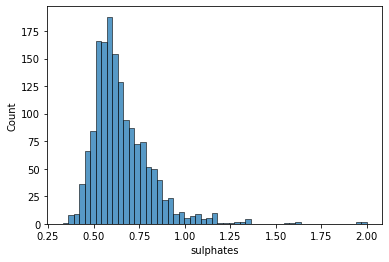

In [27]:
sns.histplot(df['sulphates'])
plt.show()

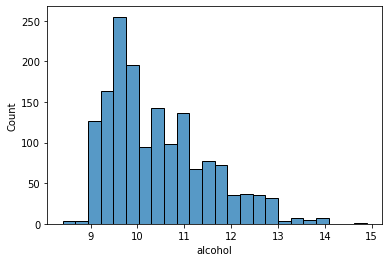

In [28]:
sns.histplot(df['alcohol'])
plt.show()

# Bivarient analysis

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

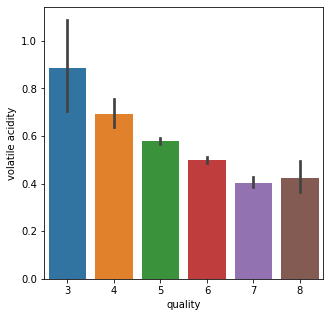

In [45]:
#volatile acidity vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data=df)

with the increase of volatile acidity quality of wine is decreasing  

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

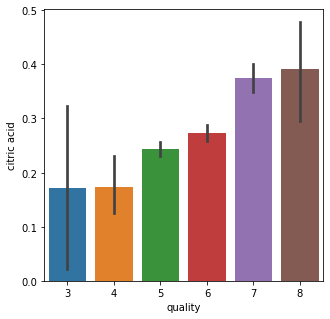

In [46]:
#citric acid  vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid', data=df)

with increase of citric acid quality of wine is also increasing 

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

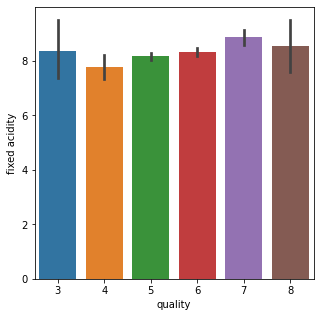

In [47]:
#volatile acidity vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='fixed acidity', data=df)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

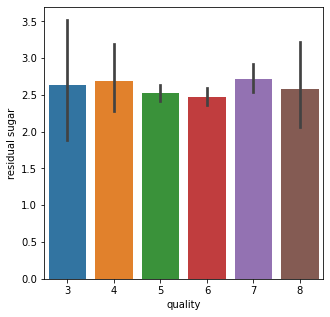

In [48]:
#volatile acidity vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='residual sugar', data=df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

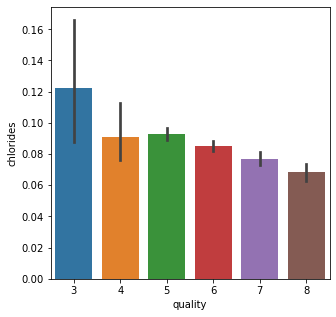

In [49]:
#volatile acidity vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='chlorides', data=df)

Here we can also see as the number of chlorides increse quality of wine also decrese 

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

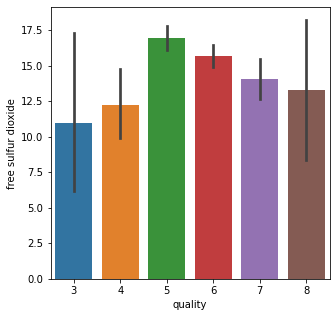

In [50]:
#volatile acidity vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='free sulfur dioxide', data=df)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

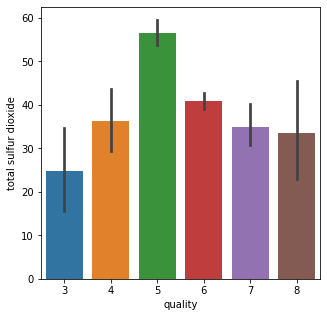

In [51]:
#volatile acidity vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='total sulfur dioxide', data=df)

<AxesSubplot:xlabel='quality', ylabel='density'>

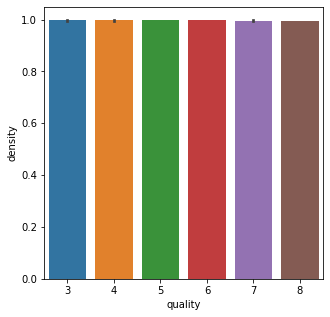

In [52]:
#volatile acidity vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='density', data=df)

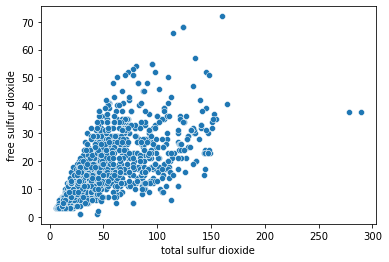

In [29]:
sns.scatterplot(data=df, x='total sulfur dioxide', y='free sulfur dioxide')
plt.show()

Here 'total sulfur dioxide' and 'free sulfur dioxide' has a positive relation

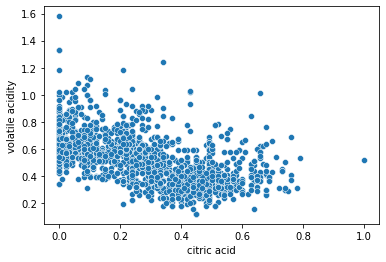

In [31]:
sns.scatterplot(data=df, x='citric acid', y='volatile acidity')
plt.show()

Here 'citric acid' and 'volatile acidity' has a negitive relation

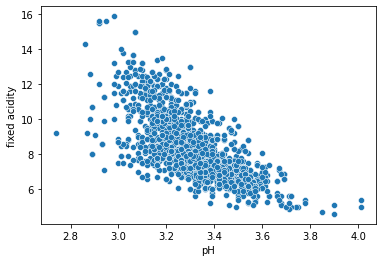

In [33]:
sns.scatterplot(data=df, x='pH', y='fixed acidity')
plt.show()

Here 'pH' and 'fixed acidity' has a negative relation

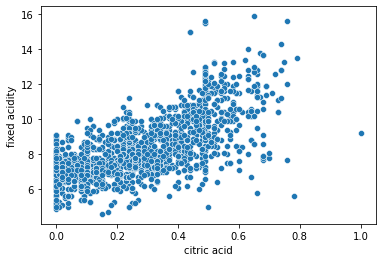

In [34]:
sns.scatterplot(data=df, x='citric acid', y='fixed acidity')
plt.show()

Here 'citric acid' and 'fixed acidity' has a positive relation

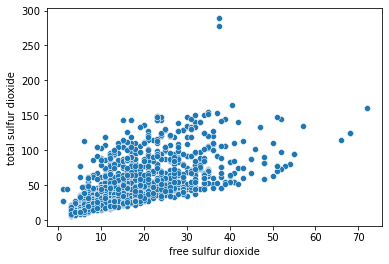

In [35]:
sns.scatterplot(data=df, x='free sulfur dioxide', y='total sulfur dioxide')
plt.show()

Here 'free sulfur dioxide' and 'total sulfur dioxide' has a positive relation

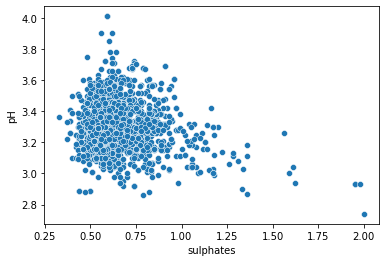

In [36]:
sns.scatterplot(data=df, x='sulphates', y='pH')
plt.show()

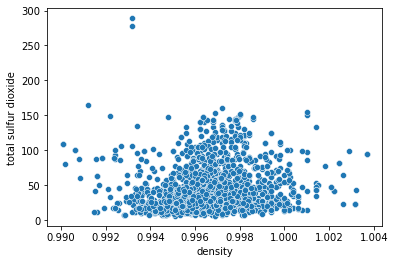

In [37]:
sns.scatterplot(data=df, x='density', y='total sulfur dioxide')
plt.show()

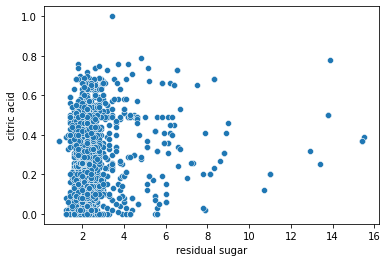

In [38]:
sns.scatterplot(data=df, x='residual sugar', y='citric acid')
plt.show()

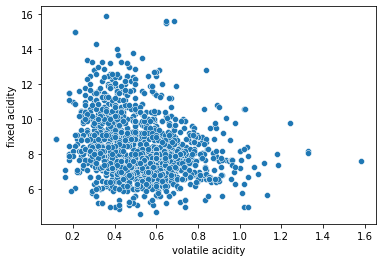

In [39]:
sns.scatterplot(data=df, x='volatile acidity', y='fixed acidity')
plt.show()

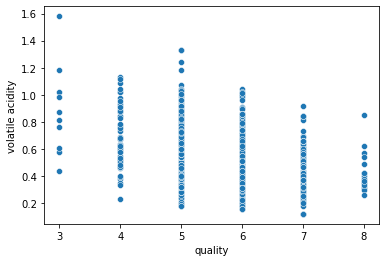

In [40]:
sns.scatterplot(data=df, x='quality', y='volatile acidity')
plt.show()

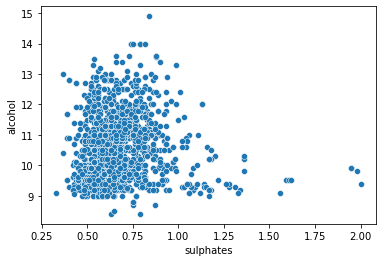

In [41]:
sns.scatterplot(data=df, x='sulphates', y='alcohol')
plt.show()

# Multivarient Analysis

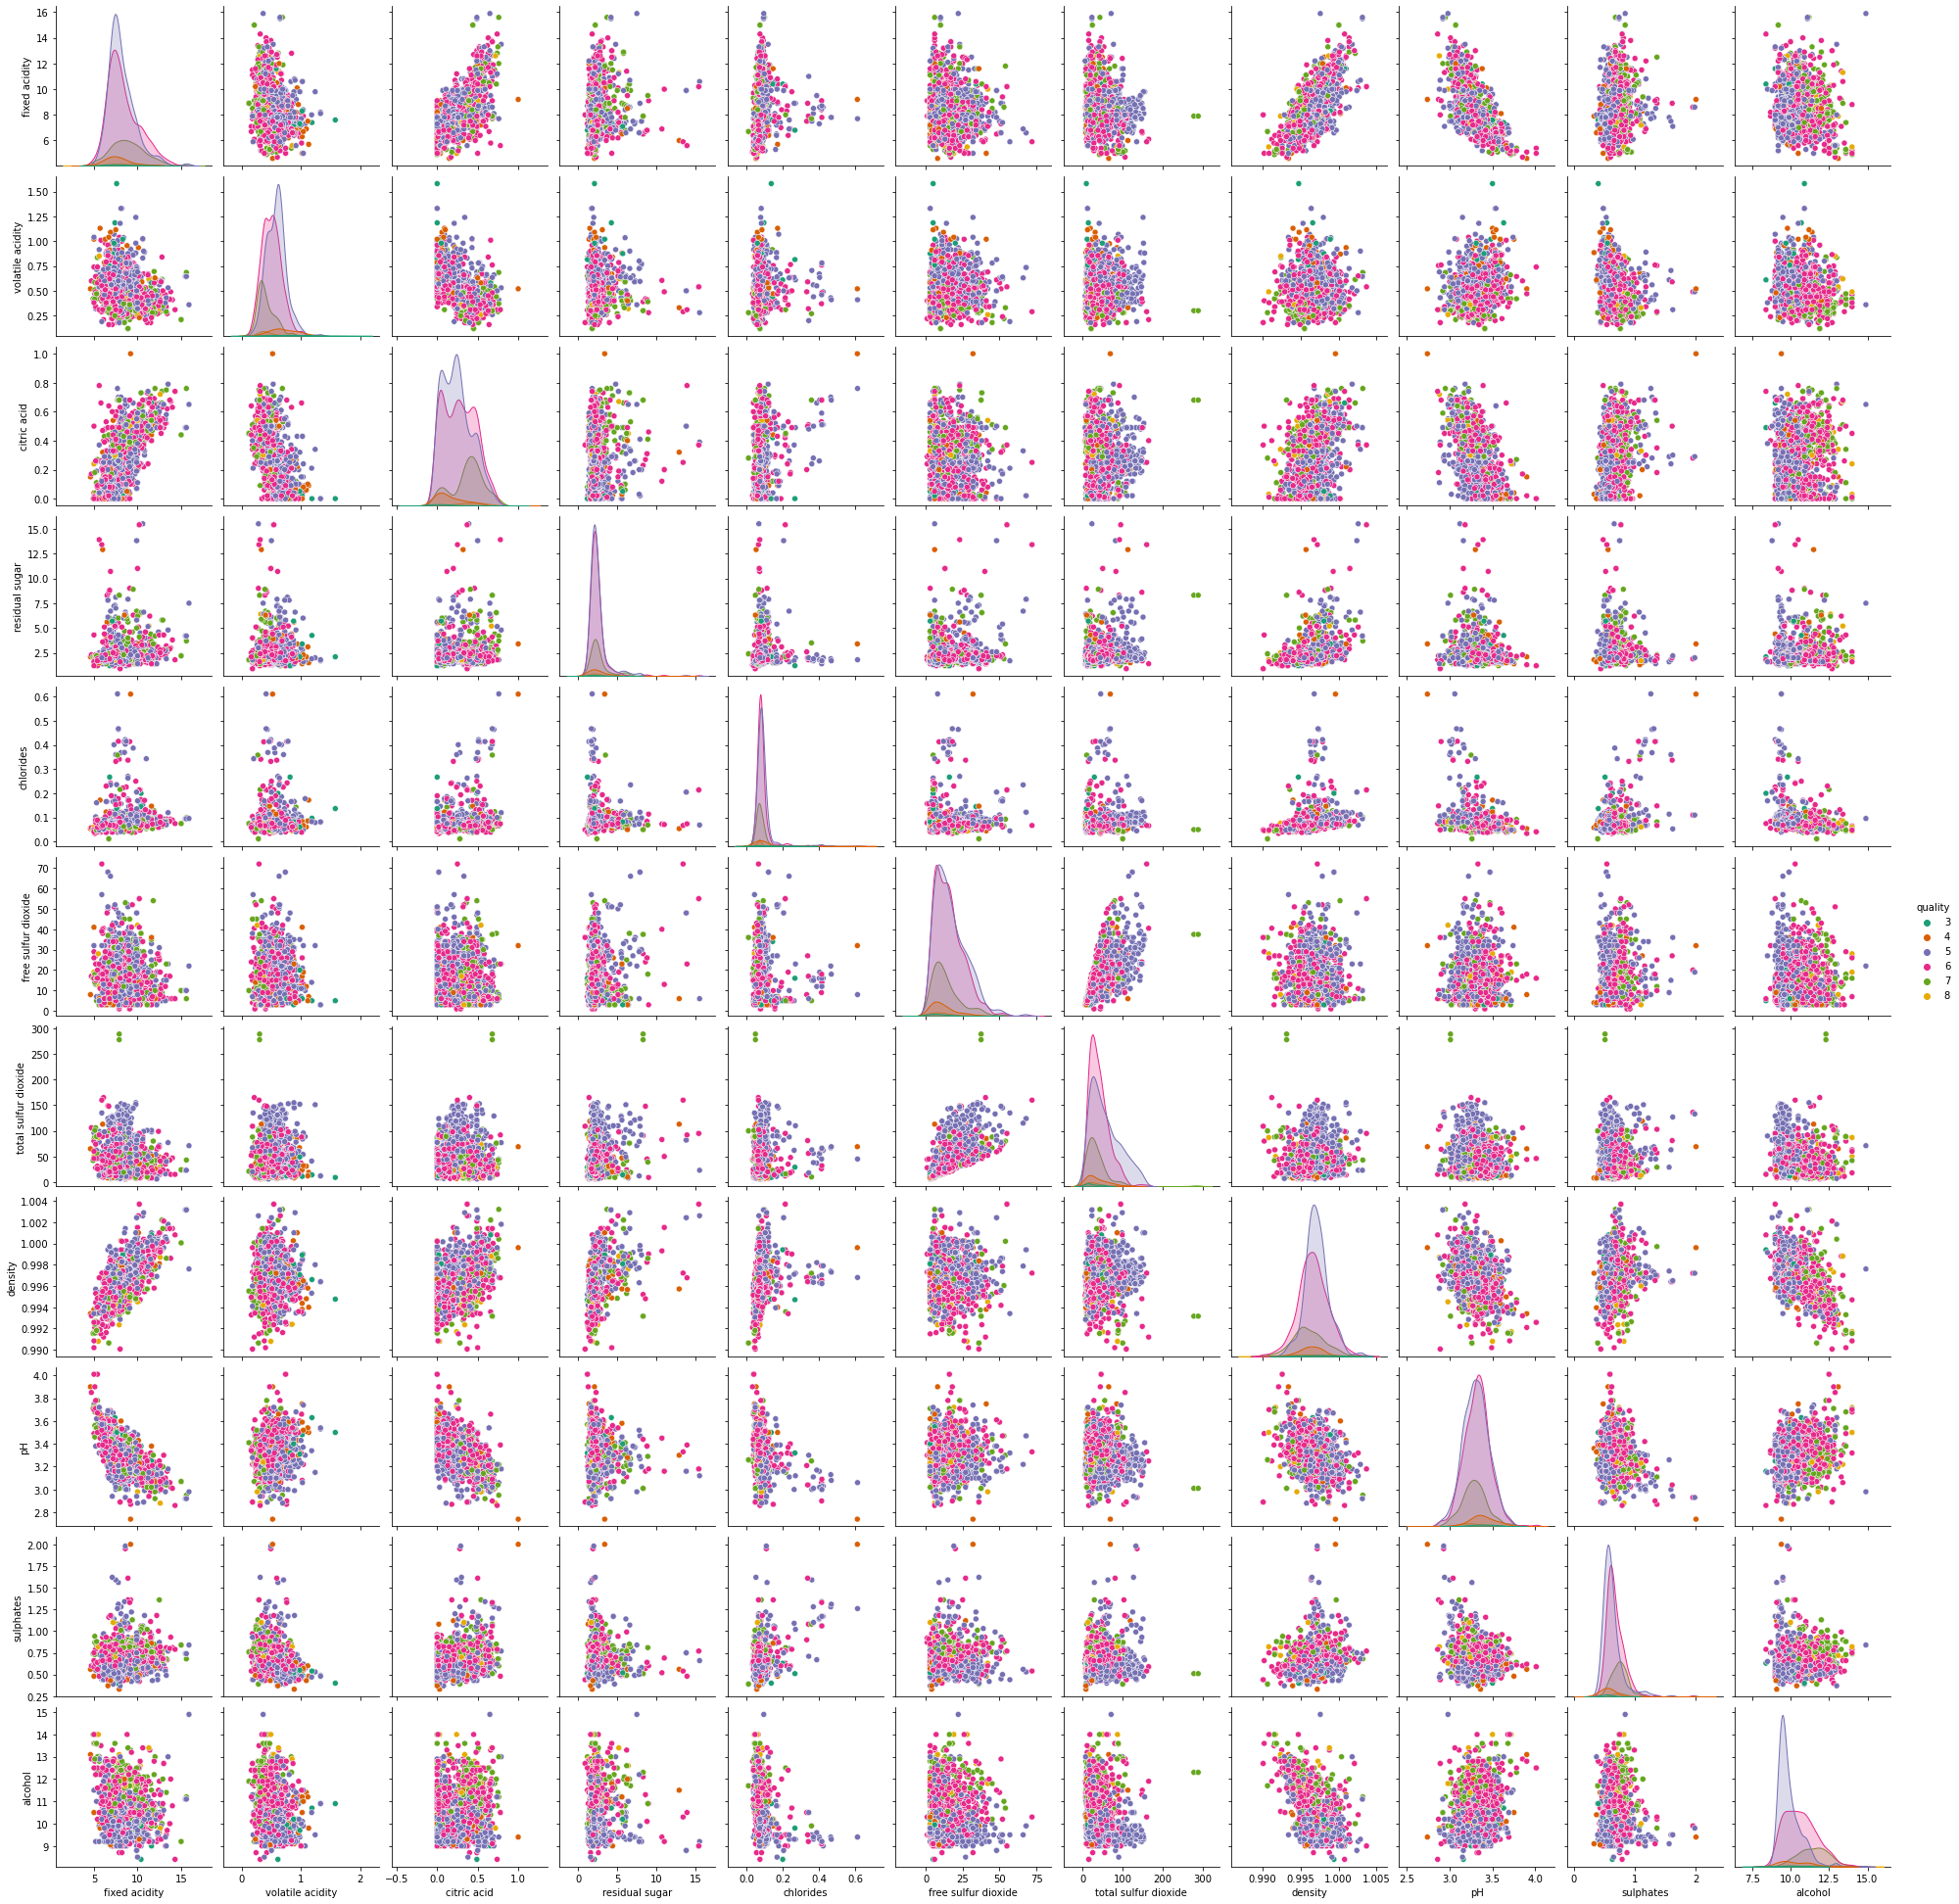

In [53]:
sns.pairplot(df, palette='Dark2', hue='quality')
plt.show()

# Checking for outliers

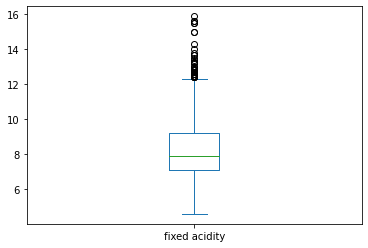

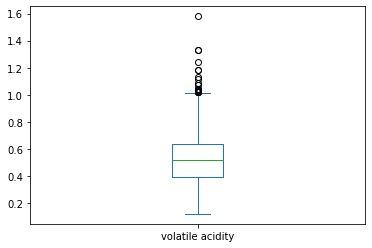

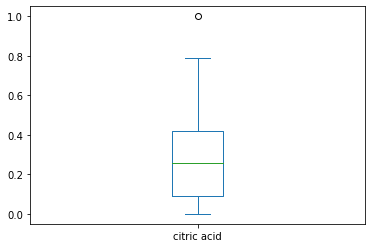

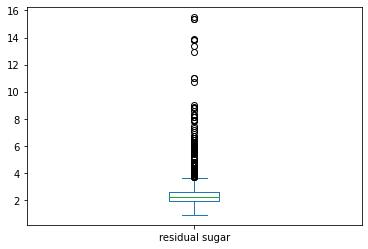

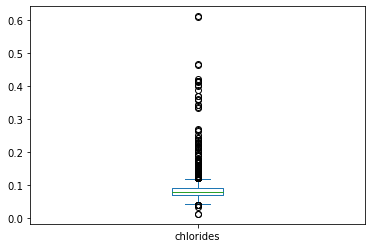

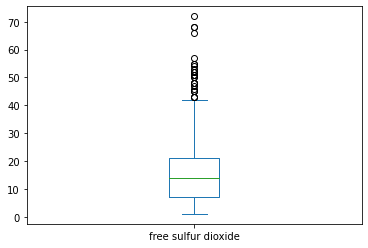

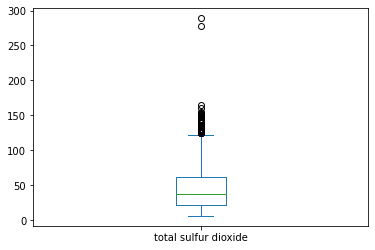

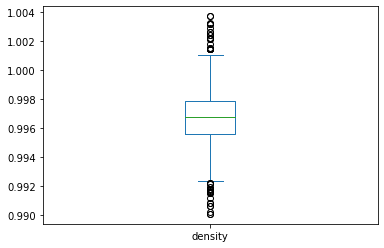

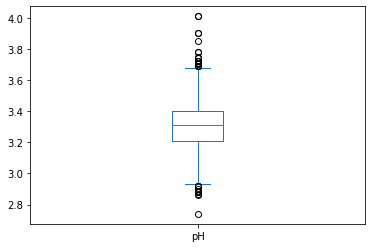

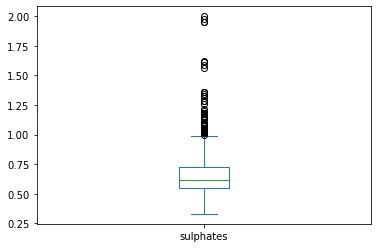

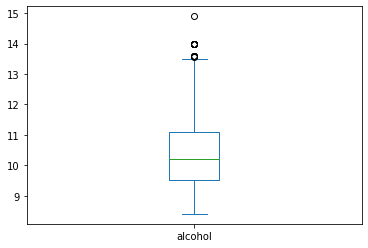

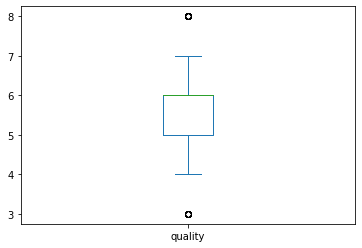

In [54]:
#Box plot visualization
for i in df.columns:
    df[i].plot.box()
    plt.show()

Here by using box plot we can see that outliers are present in the dataset

# Removing outliers

In [55]:
#Removing outliers
from scipy.stats import zscore
col=df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']]
z=np.abs(zscore(col))

z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246
1,0.298547,1.967442,1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,0.719933,0.128950,0.584777
2,0.298547,1.297065,1.186070,0.169427,0.096353,0.083669,0.229047,0.134264,0.331177,0.048089,0.584777
3,1.654856,1.384443,1.484154,0.453218,0.264960,0.107592,0.411500,0.664277,0.979104,0.461180,0.584777
4,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.403229,0.980669,0.382271,0.053845,1.542054,0.075043,0.978765,0.899886,0.461180,0.072294
1595,1.390155,0.123905,0.877968,0.240375,0.541259,2.211469,0.137820,0.862162,1.353436,0.601055,0.729364
1596,1.160343,0.099554,0.723916,0.169427,0.243707,1.255161,0.196679,0.533554,0.705508,0.542042,0.541630
1597,1.390155,0.654620,0.775267,0.382271,0.264960,1.542054,0.075043,0.676657,1.677400,0.305990,0.209308


In [56]:
threshold=3

print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
        557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
        649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
        695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
        889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
       1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
       1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
       1270, 1270, 1288, 1289, 1295, 1296, 1299, 1

In [57]:
df_new=df[(z<3).all(axis=1)]

df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [58]:
df.shape

(1599, 12)

In [59]:
df_new.shape

(1458, 12)

In [60]:
df=df_new

outliers are removed from the dataset

# Checking for skewness

In [62]:
#checking for skewness
df.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
quality                 0.248823
dtype: float64

In [63]:
#Removing skewness using cube root method
df['residual sugar']=np.cbrt(df['residual sugar'])
df['chlorides']=np.cbrt(df['chlorides'])
df['total sulfur dioxide']=np.cbrt(df['total sulfur dioxide'])
df['fixed acidity']=np.cbrt(df['fixed acidity'])
df['sulphates']=np.cbrt(df['sulphates'])
df['alcohol']=np.cbrt(df['alcohol'])

In [64]:
#Checking skewness agian
df.skew()

fixed acidity           0.527560
volatile acidity        0.392097
citric acid             0.292600
residual sugar          1.629756
chlorides               1.056128
free sulfur dioxide     0.869727
total sulfur dioxide    0.343010
density                 0.055543
pH                      0.113039
sulphates               0.526494
alcohol                 0.643830
quality                 0.248823
dtype: float64

Here we can see that the skewness is removed

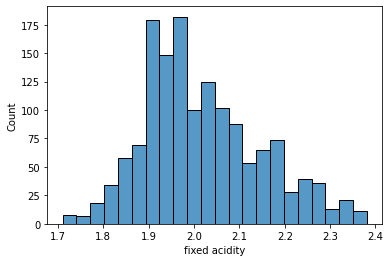

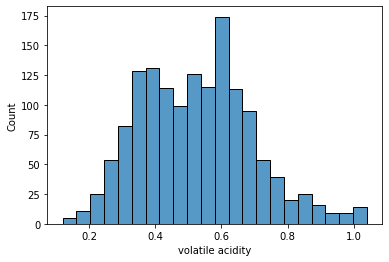

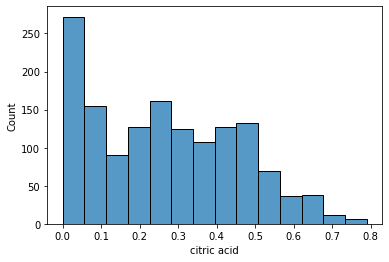

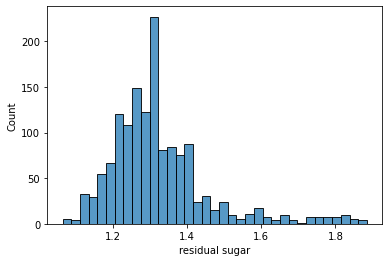

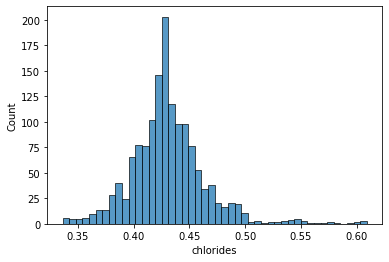

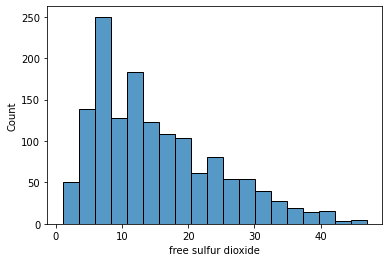

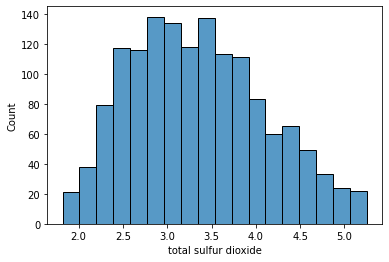

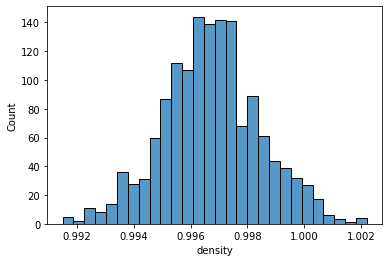

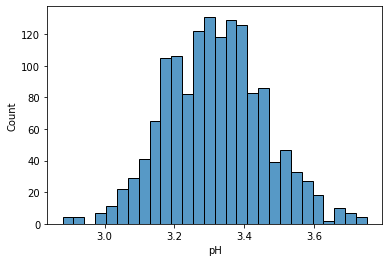

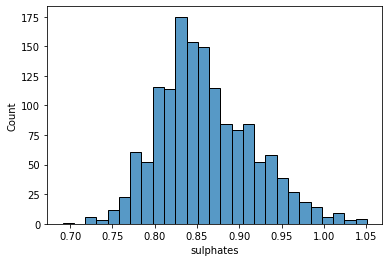

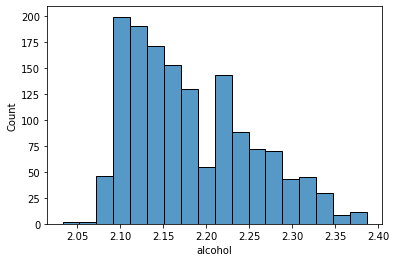

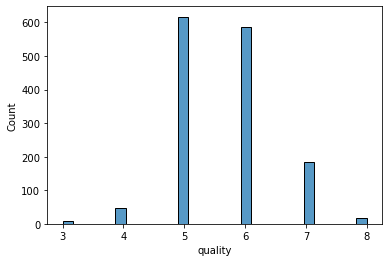

In [65]:
#checking for skewness by visualizing
for i in df.columns:
    sns.histplot(df[i])
    plt.show()

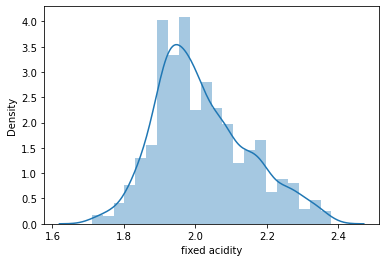

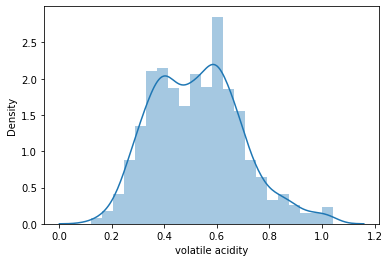

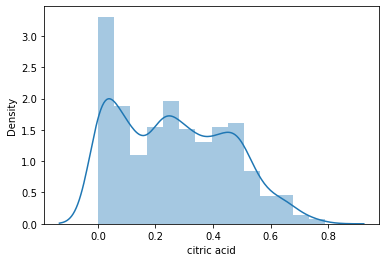

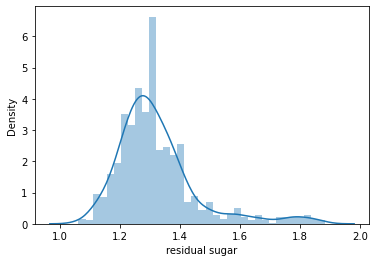

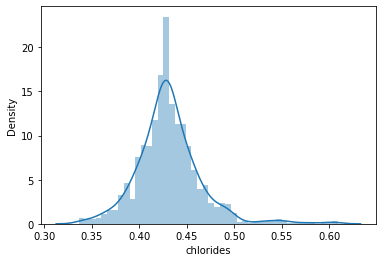

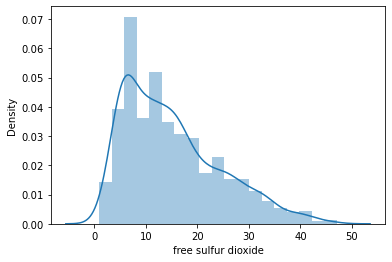

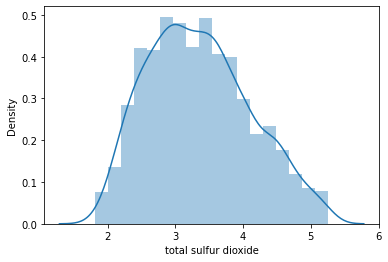

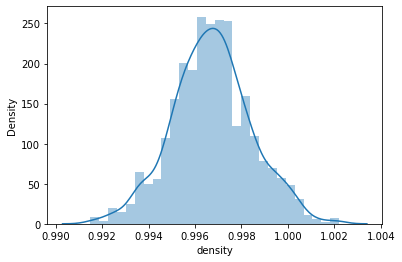

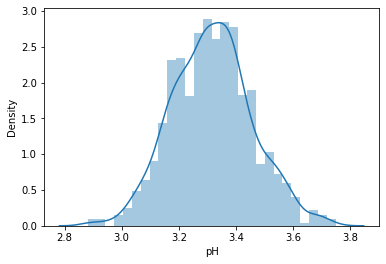

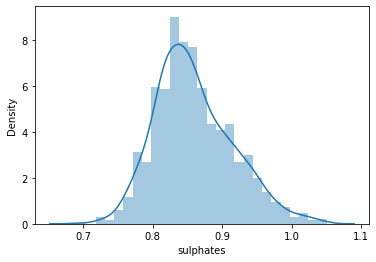

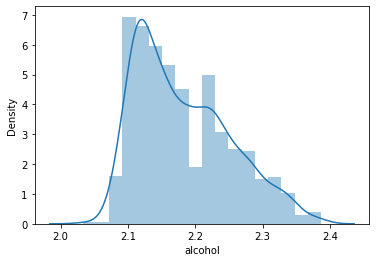

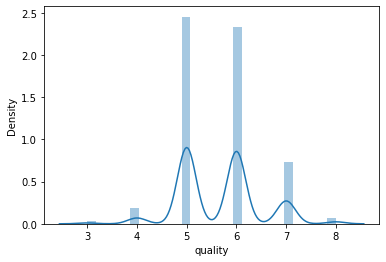

In [66]:
#checking for skewness by using distplot
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

# Seprating features and label

In [67]:
x=df.drop('quality', axis=1)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.948695,0.700,0.00,1.238562,0.423582,11.0,3.239612,0.99780,3.51,0.824257,2.110454
1,1.983192,0.880,0.00,1.375069,0.461044,25.0,4.061548,0.99680,3.20,0.879366,2.139975
2,1.983192,0.760,0.04,1.320006,0.451436,15.0,3.779763,0.99700,3.26,0.866239,2.139975
3,2.237378,0.280,0.56,1.238562,0.421716,17.0,3.914868,0.99800,3.16,0.833955,2.139975
4,1.948695,0.700,0.00,1.238562,0.423582,11.0,3.239612,0.99780,3.51,0.824257,2.110454
...,...,...,...,...,...,...,...,...,...,...,...
1594,1.837091,0.600,0.08,1.259921,0.448140,32.0,3.530348,0.99490,3.45,0.833955,2.189760
1595,1.806969,0.550,0.10,1.300591,0.395789,39.0,3.708430,0.99512,3.52,0.912581,2.237378
1596,1.846915,0.510,0.13,1.320006,0.423582,29.0,3.419952,0.99574,3.42,0.908560,2.223980
1597,1.806969,0.645,0.12,1.259921,0.421716,32.0,3.530348,0.99547,3.57,0.892112,2.168703


Label Binarization

In [69]:
y=df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1458, dtype: int64

In [70]:
x.shape

(1458, 11)

In [71]:
y.shape

(1458,)

In [72]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.529589,1.038708,-1.387413,-0.610269,-0.212751,-0.439085,-0.151874,0.629873,1.374768,-0.621424,-1.019282
1,-0.263403,2.101325,-1.387413,0.388180,0.883719,1.063952,0.934243,0.047678,-0.823752,0.359794,-0.597376
2,-0.263403,1.392914,-1.178214,-0.014565,0.602501,-0.009646,0.561889,0.164117,-0.398232,0.126070,-0.597376
3,1.697926,-1.440732,1.541370,-0.610269,-0.267369,0.205073,0.740417,0.746312,-1.107432,-0.448750,-0.597376
4,-0.529589,1.038708,-1.387413,-0.610269,-0.212751,-0.439085,-0.151874,0.629873,1.374768,-0.621424,-1.019282
...,...,...,...,...,...,...,...,...,...,...,...
1453,-1.390745,0.448365,-0.969015,-0.454045,0.506051,1.815470,0.232309,-1.058494,0.949248,-0.448750,0.114140
1454,-1.623168,0.153194,-0.864416,-0.156569,-1.026243,2.566989,0.467628,-0.930411,1.445688,0.951183,0.794696
1455,-1.314940,-0.082944,-0.707517,-0.014565,-0.212751,1.493391,0.086430,-0.569449,0.736488,0.879603,0.603216
1456,-1.623168,0.714019,-0.759816,-0.454045,-0.267369,1.815470,0.232309,-0.726642,1.800288,0.586742,-0.186800


We have scaled the data using standard scalarization method to overcome the issue of biasness standard scaler will convert mean=0 and std=1

# Checking Variance Inflation factor(VIF)

In [73]:
#Finding varience inflation factor in each column

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i)
            for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF Values,Features
0,8.148408,fixed acidity
1,1.856310,volatile acidity
2,3.109926,citric acid
3,1.756294,residual sugar
4,1.212677,chlorides
5,2.229932,free sulfur dioxide
6,2.501564,total sulfur dioxide
7,6.765032,density
8,3.351263,pH
9,1.342157,sulphates


In [74]:
#dropping density column 
x.drop('fixed acidity', axis=1, inplace=True)

In [75]:
#again checking vif value to confrim whether the multicollinearity still exists or not
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i)
            for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF values,Features
0,1.854894,volatile acidity
1,2.810131,citric acid
2,1.511397,residual sugar
3,1.199940,chlorides
4,2.205064,free sulfur dioxide
5,2.399532,total sulfur dioxide
6,2.726582,density
7,1.526975,pH
8,1.327652,sulphates
9,2.391164,alcohol


so we have solved multicolinearity issue we can now move ahead for model building.

In [76]:
y.value_counts()

0    1257
1     201
Name: quality, dtype: int64

Here we can see that the data is not balanced since it is a classification problem we will balance the data using oversampling method

# Oversampling

In [77]:
#oversampling the data
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [78]:
#checking value count of target column
y.value_counts()

0    1257
1    1257
Name: quality, dtype: int64

Here we can see that the data is balanced and now we can use further machine learning model

# Modeling

# For the best random state

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccuracy=0
maxRandomState=0

for i in range(1,500):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.30, random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccuracy:
        maxAccuracy=acc
        maxRandomState=i
        
print('Best accuracy is', maxAccuracy, 'at random_state', maxRandomState)

Best accuracy is 0.9589403973509933 at random_state 94


# Split the data into train test split

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30, random_state=maxRandomState)

In [81]:
x_train

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1354,0.271262,-0.864416,-0.302945,-1.973549,-1.190604,-1.493941,-1.303016,0.878328,0.951183,0.409401
1049,-2.031075,1.279872,-0.855233,-0.490828,3.211148,1.444852,-0.860547,0.098208,0.951183,1.355798
705,0.625468,-0.498318,0.761021,0.929463,0.634513,2.066873,0.746312,-1.603872,-0.979518,-1.126622
2134,1.477336,-1.200613,-1.330784,-2.222137,-0.270389,1.432035,-2.474068,1.729368,1.589730,2.336965
585,-0.023909,-1.021315,-1.487058,-0.322474,-1.083244,-0.845871,0.338775,0.027288,1.299971,-0.806864
...,...,...,...,...,...,...,...,...,...,...
2226,0.355468,1.840768,1.505642,1.956246,-0.940577,-1.096372,0.897928,-1.607669,1.035954,1.288720
1347,0.330297,1.436771,-0.302945,1.581418,-1.297964,-1.684087,0.274734,0.098208,-0.534582,-0.085839
1381,-0.319081,1.018373,-0.156569,1.581418,-0.868525,-0.845871,-0.144447,0.027288,-0.033770,0.114140
2240,-0.818178,1.051683,0.356516,-1.496142,-0.016179,-0.362088,-0.972050,0.078860,1.682083,2.489352


In [82]:
x_test

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1433,0.979674,0.286178,-0.156569,-0.605716,2.137550,1.781428,-0.231776,0.098208,-1.071894,-0.912700
84,0.123676,-0.446018,-0.610269,0.001049,-0.224366,-0.110309,0.280556,-0.114552,-0.363898,-1.453333
1376,0.212228,-0.602917,-0.772075,-0.104937,0.205073,0.880299,-2.199597,0.098208,-0.280001,0.114140
426,-1.322664,1.541370,0.639725,0.001049,-0.975884,-1.035013,-0.185200,-1.178352,2.019636,1.263624
2180,-0.546762,1.232780,0.123381,1.178798,-0.975884,-1.422844,-0.104567,-1.432425,-0.190198,1.411192
...,...,...,...,...,...,...,...,...,...,...
1352,0.684502,-1.125914,-0.610269,-0.782287,-0.653805,-1.035013,-1.023562,1.445688,1.092482,0.213178
1570,-1.089554,0.866838,-1.130793,-1.284992,0.487696,0.167213,-1.017441,-0.965592,1.683433,0.668875
18,-0.201012,-0.812116,-0.014565,0.207837,-0.653805,0.934243,0.047678,-1.036512,-0.888319,-1.019282
1289,0.035125,-1.335113,-1.114628,-0.158611,-1.297964,-0.906677,-1.000274,-1.107432,-1.552858,-0.597376


In [83]:
y_train

1354    0
1049    1
705     0
2134    1
585     0
       ..
2226    1
1347    0
1381    0
2240    1
2386    1
Name: quality, Length: 1759, dtype: int64

In [84]:
y_test

1433    0
84      0
1376    0
426     1
2180    1
       ..
1352    0
1570    1
18      0
1289    0
223     0
Name: quality, Length: 755, dtype: int64

# Importing various classification libraries

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier,RandomForestClassifier
from sklearn.linear_model import Lasso,Ridge

# DecisionTree Classifier

In [86]:
#checking accuracy for DecisionTreeclassifier
DTC=DecisionTreeClassifier()
DTC.fit(x_train, y_train)
predDTC=DTC.predict(x_test)
print('Accuracy Score',accuracy_score(y_test, predDTC))
print('Confusion Matrix',confusion_matrix(y_test, predDTC))
print('Classification Report',classification_report(y_test,predDTC))

Accuracy Score 0.9125827814569536
Confusion Matrix [[321  39]
 [ 27 368]]
Classification Report               precision    recall  f1-score   support

           0       0.92      0.89      0.91       360
           1       0.90      0.93      0.92       395

    accuracy                           0.91       755
   macro avg       0.91      0.91      0.91       755
weighted avg       0.91      0.91      0.91       755



The accuracy score using DecisionTree classifier is 91.25%

# Support Vector Classifier

In [88]:
#checking accuracy for support vector machine classifier

svc=SVC()
svc.fit(x_train,y_train)
predsvc= svc.predict(x_test)
print('Accuracy Score', accuracy_score(y_test,predsvc))
print('Confusion Matrix', confusion_matrix(y_test,predsvc))
print('Classification Report', classification_report(y_test,predsvc))

Accuracy Score 0.8966887417218543
Confusion Matrix [[310  50]
 [ 28 367]]
Classification Report               precision    recall  f1-score   support

           0       0.92      0.86      0.89       360
           1       0.88      0.93      0.90       395

    accuracy                           0.90       755
   macro avg       0.90      0.90      0.90       755
weighted avg       0.90      0.90      0.90       755



The accuracy score using support vector classifier is 89.66%

# K-Neighbors Classifier

In [90]:
#checking accuracy for support k-Neighbors classifier

KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
predKNN= KNN.predict(x_test)
print('Accuracy Score', accuracy_score(y_test,predKNN))
print('Confusion Matrix', confusion_matrix(y_test,predKNN))
print('Classification Report', classification_report(y_test,predKNN))

Accuracy Score 0.8966887417218543
Confusion Matrix [[286  74]
 [  4 391]]
Classification Report               precision    recall  f1-score   support

           0       0.99      0.79      0.88       360
           1       0.84      0.99      0.91       395

    accuracy                           0.90       755
   macro avg       0.91      0.89      0.89       755
weighted avg       0.91      0.90      0.90       755



The accuracy score using support vector classifier is 89.66%

# Random Forest Classifier

In [91]:
#checking accuracy for randomforestclassifier
RFC=RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC=RFC.predict(x_test)
print('Accuracy Score', accuracy_score(y_test, predRFC))
print('Confusion Matrix', confusion_matrix(y_test, predRFC))
print('Classification Report', classification_report(y_test,predRFC))

Accuracy Score 0.9562913907284768
Confusion Matrix [[340  20]
 [ 13 382]]
Classification Report               precision    recall  f1-score   support

           0       0.96      0.94      0.95       360
           1       0.95      0.97      0.96       395

    accuracy                           0.96       755
   macro avg       0.96      0.96      0.96       755
weighted avg       0.96      0.96      0.96       755



The accuracy score using Random forest Classifier is 95.62%

# Gradient Boosting Classifier

In [92]:
#checking accuracy for gradient boosting classifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print('Accuracy Score', accuracy_score(y_test,predGB))
print('Confusion Matrix', confusion_matrix(y_test,predGB))
print('Classification Report', classification_report(y_test,predGB))

Accuracy Score 0.9311258278145695
Confusion Matrix [[325  35]
 [ 17 378]]
Classification Report               precision    recall  f1-score   support

           0       0.95      0.90      0.93       360
           1       0.92      0.96      0.94       395

    accuracy                           0.93       755
   macro avg       0.93      0.93      0.93       755
weighted avg       0.93      0.93      0.93       755



The accuracy score using Gradient boosting Classifier is 93.11%

# AdaBoost Classifier

In [93]:
#checking accuracy for AdaBoost Classifier
ABC=AdaBoostClassifier()
ABC.fit(x_train, y_train)
predABC=ABC.predict(x_test)
print('Accuracy Score', accuracy_score(y_test,predABC))
print('Confusion Matrix', confusion_matrix(y_test,predABC))
print('Classification Report', classification_report(y_test,predABC))

Accuracy Score 0.8966887417218543
Confusion Matrix [[314  46]
 [ 32 363]]
Classification Report               precision    recall  f1-score   support

           0       0.91      0.87      0.89       360
           1       0.89      0.92      0.90       395

    accuracy                           0.90       755
   macro avg       0.90      0.90      0.90       755
weighted avg       0.90      0.90      0.90       755



The accuracy score using Ada boost Classifier is 89.66% 

# Bagging Classifier

In [94]:
#checking accuracy for Bagging classifier

BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC= BC.predict(x_test)
print('Accuracy Score', accuracy_score(y_test,predBC))
print('Confusion Matrix', confusion_matrix(y_test,predBC))
print('Classification Report', classification_report(y_test,predBC))

Accuracy Score 0.9271523178807947
Confusion Matrix [[333  27]
 [ 28 367]]
Classification Report               precision    recall  f1-score   support

           0       0.92      0.93      0.92       360
           1       0.93      0.93      0.93       395

    accuracy                           0.93       755
   macro avg       0.93      0.93      0.93       755
weighted avg       0.93      0.93      0.93       755



The accuracy score using Bagging Classifier is 92.71%

# ExtraTreeClassifier

In [95]:
#checking accuracy for ExtraTreeClassifier

ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print('Accuracy Score', accuracy_score(y_test,predET))
print('Confusion Matrix', confusion_matrix(y_test,predET))
print('Classification Report', classification_report(y_test,predET))

Accuracy Score 0.9748344370860927
Confusion Matrix [[344  16]
 [  3 392]]
Classification Report               precision    recall  f1-score   support

           0       0.99      0.96      0.97       360
           1       0.96      0.99      0.98       395

    accuracy                           0.97       755
   macro avg       0.98      0.97      0.97       755
weighted avg       0.98      0.97      0.97       755



The accuracy score using extra tree classification is 97.48%

# Cross Validation Score

In [96]:
#using k-fold cross validation for decision tree classifier 
cvscore=cross_val_score(DTC,x,y)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',accuracy_score(y_test,predDTC) - cvscore.mean())

[0.90059642 0.85685885 0.88071571 0.82107356 0.86055777]
0.8639604603454967
Difference between Accuracy score and cross validation score is - 0.04862232111145692


In [97]:
#using k-fold cross validation for support vector classifier
cvscore=cross_val_score(svc,x,y)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',accuracy_score(y_test,predsvc) - cvscore.mean())

[0.93439364 0.81312127 0.90059642 0.82902584 0.86454183]
0.8683358019215385
Difference between Accuracy score and cross validation score is - 0.028352939800315835


In [98]:
#Using k-fold cross validation for K-Neighbour Classifier

cvscore=cross_val_score(KNN,x,y)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',accuracy_score(y_test,predKNN) - cvscore.mean())

[0.91053678 0.81510934 0.88469185 0.77932406 0.83266932]
0.8444662701084331
Difference between Accuracy score and cross validation score is - 0.052222471613421195


In [99]:
#Using k-fold cross validation for Random Forest Classifier

cvscore=cross_val_score(RFC,x,y)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',accuracy_score(y_test,predRFC) - cvscore.mean())

[0.96620278 0.88667992 0.93836978 0.87077535 0.91035857]
0.914477279747808
Difference between Accuracy score and cross validation score is - 0.041814110980668784


In [100]:
#using k-fold cross validation for gradient boosting classifier
cvscore=cross_val_score(GB,x,y)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',accuracy_score(y_test,predGB) - cvscore.mean())

[0.92842942 0.86083499 0.91053678 0.8389662  0.87051793]
0.881857064782619
Difference between Accuracy score and cross validation score is - 0.04926876303195049


In [101]:
#using k-fold cross validation for Adaboosting classifier
cvscore=cross_val_score(ABC,x,y)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',accuracy_score(y_test,predABC) - cvscore.mean())

[0.88866799 0.83101392 0.87673956 0.77733598 0.82270916]
0.8392933237230006
Difference between Accuracy score and cross validation score is - 0.057395417998853726


In [102]:
#using k-fold cross validation for Bagging classifier
cvscore=cross_val_score(BC,x,y)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',accuracy_score(y_test,predBC) - cvscore.mean())

[0.92047714 0.89463221 0.91053678 0.86083499 0.90836653]
0.8989695294369243
Difference between Accuracy score and cross validation score is - 0.028182788443870344


In [103]:
#using k-fold cross validation for ExtraTrees classifier
cvscore=cross_val_score(ET,x,y)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',accuracy_score(y_test,predET) - cvscore.mean())

[0.98011928 0.90059642 0.96023857 0.88469185 0.93625498]
0.9323802206680236
Difference between Accuracy score and cross validation score is - 0.042454216418069124


# Hyper parameter Tuning

Here we use extra tree classifier as it is giving highest accuracy

In [104]:
from sklearn.model_selection import GridSearchCV

parameters={'criterion': ['gini','entropy'],
            'random_state': [10,50,1000],
            'max_depth': [0,10,20],
            'n_jobs': [-2,-1,1],
            'n_estimators': [50,100,200,300]}

In [105]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters, cv=5)

In [106]:
GCV.fit(x_train,y_train)

exception calling callback for <Future at 0x220da06a940 state=finished raised ValueError>
Traceback (most recent call last):
  File "C:\Users\asus\anaconda3\lib\site-packages\joblib\externals\loky\_base.py", line 26, in _invoke_callbacks
    callback(self)
  File "C:\Users\asus\anaconda3\lib\site-packages\joblib\parallel.py", line 385, in __call__
    self.parallel.dispatch_next()
  File "C:\Users\asus\anaconda3\lib\site-packages\joblib\parallel.py", line 834, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "C:\Users\asus\anaconda3\lib\site-packages\joblib\parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\asus\anaconda3\lib\site-packages\joblib\parallel.py", line 819, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\asus\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 556, in apply_async
    future = self._workers.submit(SafeFunction(func))
  File "C:\Users\a

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [107]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 50,
 'n_jobs': -2,
 'random_state': 50}

# Final Model

In [108]:
Final_model=ExtraTreesClassifier(criterion='entropy', max_depth=20, n_jobs=-2, n_estimators=50, random_state=50)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

97.08609271523179


The final Model is giving us accuracy of 97.08% 

# plotting ROC and compare AUC for all the models used¶

In [118]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

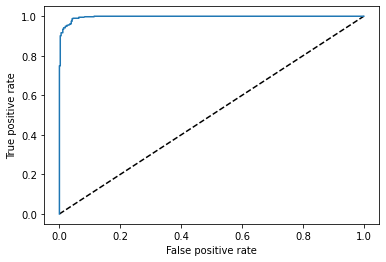

Auc score:
 0.9699367088607594


In [116]:
y_pred_prob=Final_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
roc_auc=auc(fpr,tpr)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr,label= 'Random Forest Classifier(area=%0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()
auc_score=roc_auc_score(y_test, Final_model.predict(x_test))
print('Auc score:' '\n', auc_score)

# Saving model

In [109]:
#saving the model
import joblib
joblib.dump(Final_model, "Telecom_customer_churn_analysis.pkl")

['Telecom_customer_churn_analysis.pkl']

# Predicting wine quality

In [113]:
#Lets Load the saved model 
model=joblib.load("Telecom_customer_churn_analysis.pkl")

#prediction
input_data=(6.6,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2)

#change the input data into numpy array
array=np.asarray(input_data)


#reshape the data as we are predicting the label for only one instance
array_reshape=array.reshape(1,-1)

prediction=model.predict(array_reshape)

print(prediction)

if (prediction[0]==1):
    print('Good Quality Wine')
    
else:
    print('Bad Quality Wine ')

[0]
Bad Quality Wine 


Here we can predict that for the given input the quality of wine is bad 